<a href="https://colab.research.google.com/github/souzamatt01/Desafios-Formacao-em-Dados/blob/main/Desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contexto:

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.

A saber RFM:

- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente

onde ticket médio = média do total gasto por pedido para cada cliente.

Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um código em Python que gera um output também csv, porém contendo apenas a identificação do cliente e métricas RFM.

## Sobre os dados:

| **Coluna** | **Descrição** |
| --- | --- |
| **CustomerID** | **Código de identificação do cliente** |
| **Description** | **Descrição do produto** |
| **InvoiceNo** | **Código da fatura** |
| **StockCode** | **Código de estoque do produto** |
| **Quantity** | **Quantidade do produto** |
| **InvoiceDate** | **Data do faturamento (compra)** |
| **UnitPrice** | **Preço unitário do produto** |
| **Country** | **País da compra** |

## Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Etapa 1: Leitura e Interpretação dos dados:

In [ ]:
#Upando o dataset
df = pd.read_csv('/content/data.csv', encoding='latin1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
#Checando a disposição dos dados:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##Etapa 2: Tratando a coluna 'CustomerID'

In [ ]:
#Eliminando os dados nulos:
df.drop(df.query('CustomerID.isnull()').index, axis=0, inplace=True)

##Etapa 3:Tratando as colunas 'UnitPrice' e 'Quantity':

In [ ]:
#Removendo valores <=0
df.drop(df.query('UnitPrice <= 0').index, axis=0, inplace=True)
df.drop(df.query('Quantity <= 0').index, axis=0, inplace=True)

##Etapa 4: Tratando as linhas duplicadas

In [ ]:
#Eliminando dados duplicados de todo o dataset
df.drop_duplicates(inplace=True)

##Etapa 5: Corrigindo os tipos de dados das colunas 'CustomerID' E 'InvoiceDate':

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


##Etapa 6: Tratando outliers das colunas'Quantity' E 'UnitPrice':

Serão Considerados Outliers Extremos os dados em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.

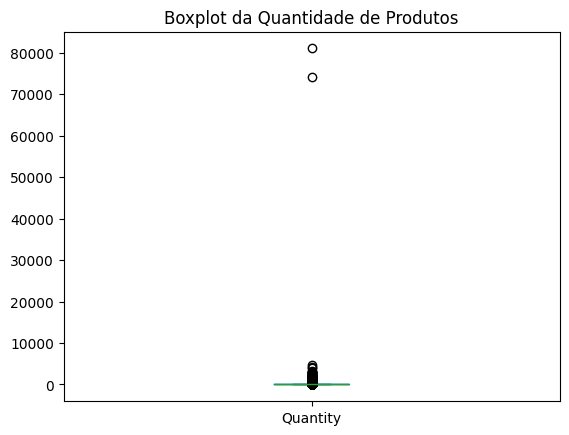

In [ ]:
#Checando os Outliers Extremos em 'Quantity'
df['Quantity'].plot.box()
plt.title('Boxplot da Quantidade de Produtos')
plt.show()

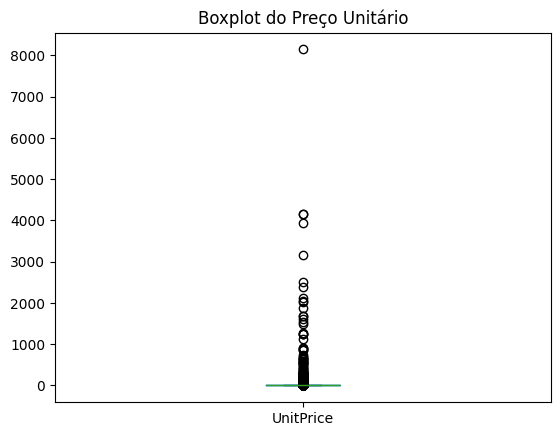

In [ ]:
#Checando os Outliers Extremos em 'UnitPrice'
df['UnitPrice'].plot.box()
plt.title('Boxplot do Preço Unitário')
plt.show()

In [ ]:
#Eliminando os Outlier Extremos:
df.drop(df.query('Quantity >= 10000').index, axis=0, inplace=True)
df.drop(df.query('UnitPrice >= 5000').index, axis=0, inplace=True)

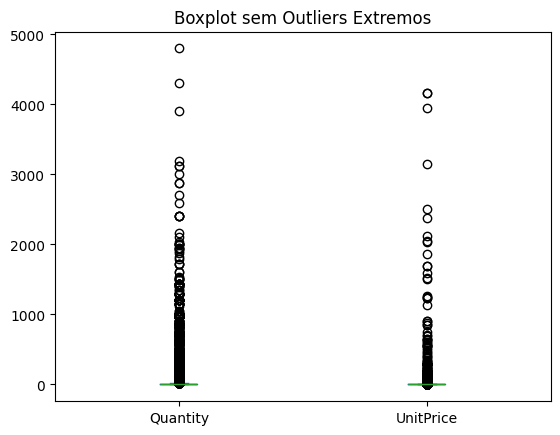

In [ ]:
df[['Quantity', 'UnitPrice']].plot.box()
plt.title('Boxplot sem Outliers Extremos')
plt.show()

##Etapa 7: Adicionando a coluna 'Total':

In [ ]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

,Quantity,UnitPrice,Total
count,392689.00,392689.00,392689.00
mean,12.72,3.11,21.99
std,43.08,18.06,95.90
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.45
75%,12.00,3.75,19.80
max,4800.00,4161.06,38970.00


##Etapa 8: Recuperando a última data de compra registrada no dataset

In [ ]:
LastDate = df['InvoiceDate'].max()
print(f'A última data de compra registrada é: {LastDate}')

A última data de compra registrada é: 2011-12-09 12:50:00


##Etapa 9: Plotando os Gráficos:



* **Top 10 países com maior valor em vendas**
* **Top 10 produtos mais vendidos**
* **Valor de venda total por mês**
* **Valor de venda total por mês e por país (considere apenas os top 10)**






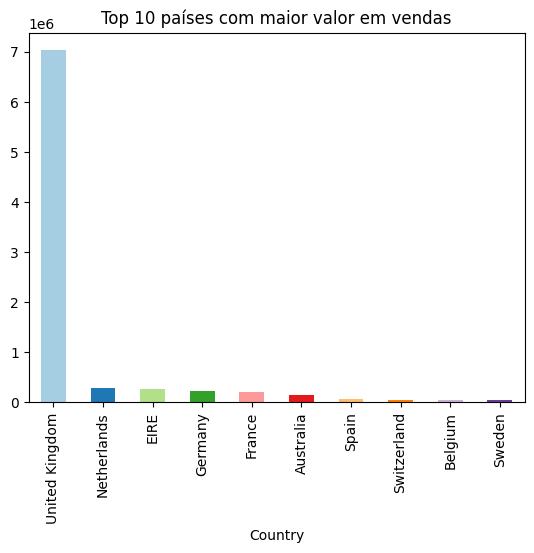

In [ ]:
#Gráfico 1: Top 10 países com maior valor em vendas
top_10_countries = df.groupby('Country')['Total'].sum().sort_values(ascending=False).head(10)
top_10_countries.plot(kind='bar', color=plt.cm.Paired(np.arange(len(top_10_countries))))
plt.title('Top 10 países com maior valor em vendas')
plt.show()

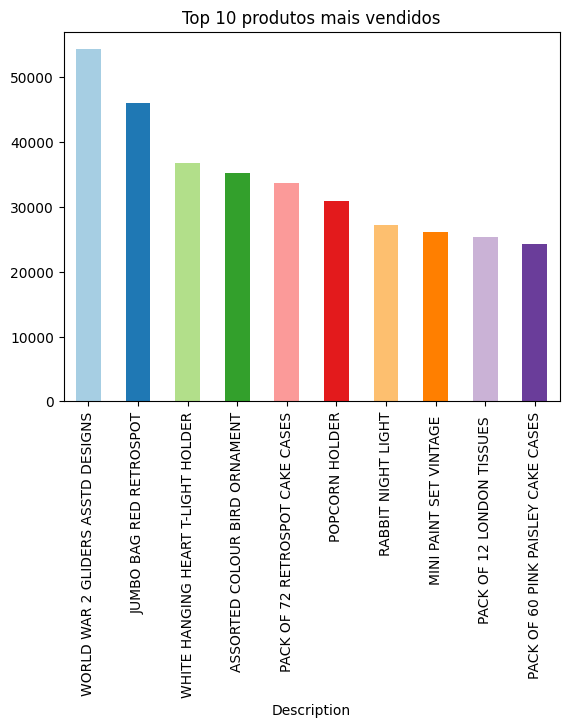

In [ ]:
#Gráfico 2: Top 10 produtos mais vendidos
top_10_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_10_products.plot(kind='bar', color=plt.cm.Paired(np.arange(len(top_10_products))))
plt.title('Top 10 produtos mais vendidos')
plt.show()

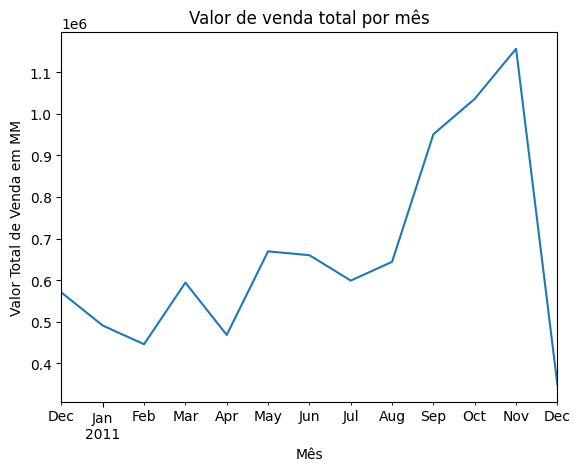

In [ ]:
# Gráfico 3: Valor de venda total por mês
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total'].sum()
new_index = pd.period_range(start=monthly_sales.index.min(), end='2011-12', freq='M')
monthly_sales = monthly_sales.reindex(new_index, fill_value=0)
monthly_sales.plot(kind='line')
plt.title('Valor de venda total por mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Venda em MM')
plt.show()

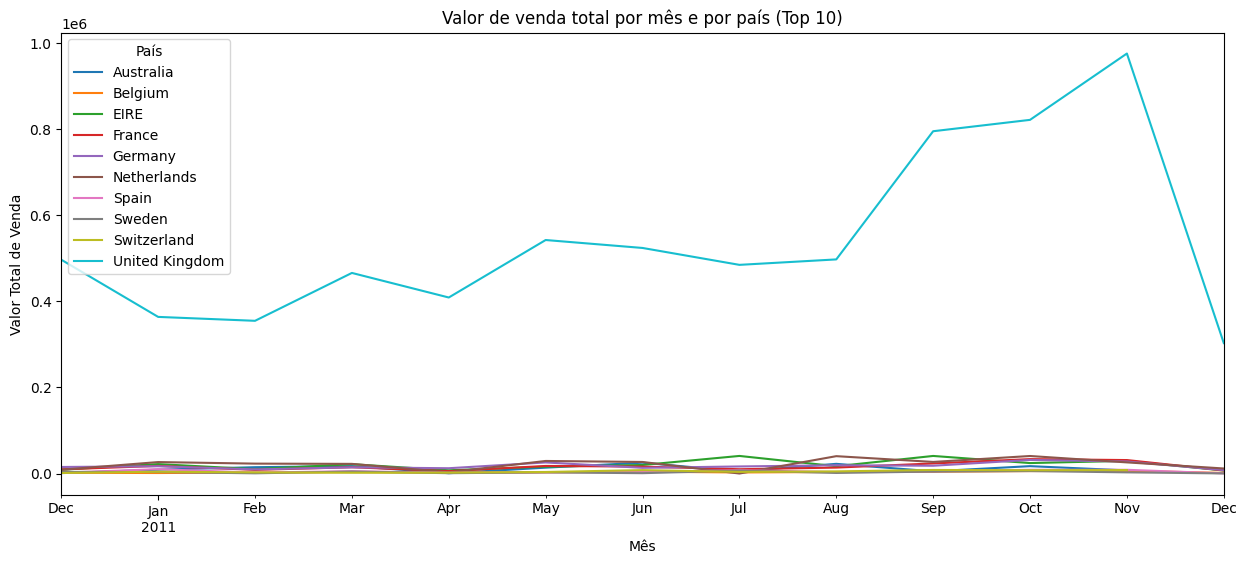

In [ ]:
# Gráfico 4: Valor de venda total por mês e por país (top 10 países)
top_countries = df.groupby('Country')['Total'].sum().nlargest(10).index
sales_by_month_country = df[df['Country'].isin(top_countries)].groupby(['Month', 'Country'])['Total'].sum().unstack()
sales_by_month_country.plot(kind='line', figsize=(15, 6))
plt.title('Valor de venda total por mês e por país (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Venda')
plt.legend(title='País')
plt.show()

##Etapa 10: Calculo do RFM:

In [ ]:
#Agrupando dados de quantidade e valor vendido por Cliente, Compra e Data:
rfm = df.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['Quantity', 'Total']].agg('sum').reset_index()
rfm = rfm.sort_values('CustomerID')
rfm

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Total
0,12347,537626,2010-12-07 14:57:00,319,711.79
1,12347,542237,2011-01-26 14:30:00,315,475.39
2,12347,549222,2011-04-07 10:43:00,483,636.25
3,12347,556201,2011-06-09 13:01:00,196,382.52
4,12347,562032,2011-08-02 08:48:00,277,584.91
...,...,...,...,...,...
18546,18283,557956,2011-06-23 19:20:00,146,192.80
18555,18283,580872,2011-12-06 12:02:00,142,208.00
18557,18287,570715,2011-10-12 10:23:00,990,1001.32
18556,18287,554065,2011-05-22 10:39:00,488,765.28


In [ ]:
#Calculando o R (Recência) de cada cliente:
r_only = rfm.groupby('CustomerID')['InvoiceDate'].max().reset_index()
r_only.columns = ['CustomerID', 'LastPurchaseDate']
r_only['Recency'] = (LastDate - r_only['LastPurchaseDate']).dt.days
r_only

,CustomerID,LastPurchaseDate,Recency
0,12347,2011-12-07 15:52:00,1
1,12348,2011-09-25 13:13:00,74
2,12349,2011-11-21 09:51:00,18
3,12350,2011-02-02 16:01:00,309
4,12352,2011-11-03 14:37:00,35
...,...,...,...
4332,18280,2011-03-07 09:52:00,277
4333,18281,2011-06-12 10:53:00,180
4334,18282,2011-12-02 11:43:00,7
4335,18283,2011-12-06 12:02:00,3


In [ ]:
#Caclculando o F (Frequência) de cada cliente:
f_only = rfm.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
f_only.columns = ['CustomerID', 'Frequency']
f_only

,CustomerID,Frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,8
...,...,...
4332,18280,1
4333,18281,1
4334,18282,2
4335,18283,16


In [ ]:
#Calculando o M (Ticket Médio) de cada cliente:
m_only = rfm.groupby('CustomerID')['Total'].mean().reset_index()
m_only.columns = ['CustomerID', 'Monetary']
m_only

,CustomerID,Monetary
0,12347,615.714286
1,12348,449.310000
2,12349,1757.550000
3,12350,334.400000
4,12352,313.255000
...,...,...
4332,18280,180.600000
4333,18281,80.820000
4334,18282,89.025000
4335,18283,127.845625


In [ ]:
#Juntando RFM em uma única tabela para melhor vizualização dos dados:
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.drop('LastPurchaseDate', axis=1)
final_rfm.head(10).style.format('{:.2f}', subset='Monetary')

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,615.71
1,12348,74,4,449.31
2,12349,18,1,1757.55
3,12350,309,1,334.40
4,12352,35,8,313.25
5,12353,203,1,89.00
6,12354,231,1,1079.40
7,12355,213,1,459.40
8,12356,22,3,937.14
9,12357,32,1,6207.67
